In [35]:
import mysql.connector as sql
import pandas as pd

In [28]:
db=sql.connect(host='localhost',user='root',password='Abhishek@567',database='hr')

In [29]:
mycursor=db.cursor()

## Task1:

In [30]:
q1="select country_name, (select region_name from regions where region_id = countries.region_id ) as Regions from countries"
mycursor.execute(q1)
data=mycursor.fetchall()
print(data)

[('Argentina', 'Americas'), ('Australia', 'Asia'), ('Belgium', 'Europe'), ('Brazil', 'Americas'), ('Canada', 'Americas'), ('Switzerland', 'Europe'), ('China', 'Asia'), ('Germany', 'Europe'), ('Denmark', 'Europe'), ('Egypt', 'Middle East and Africa'), ('France', 'Europe'), ('HongKong', 'Asia'), ('Israel', 'Middle East and Africa'), ('India', 'Asia'), ('Italy', 'Europe'), ('Japan', 'Asia'), ('Kuwait', 'Middle East and Africa'), ('Mexico', 'Americas'), ('Nigeria', 'Middle East and Africa'), ('Netherlands', 'Europe'), ('Singapore', 'Asia'), ('United Kingdom', 'Europe'), ('United States of America', 'Americas'), ('Zambia', 'Middle East and Africa'), ('Zimbabwe', 'Middle East and Africa')]


## Task2:

In [34]:
q2='select country_name, count(employee_id) as Employee_count from countries left outer join locations on locations.country_id=countries.country_id left outer join departments on departments.location_id=locations.location_id left outer join employees on employees.department_id=departments.department_id group by country_name;'
mycursor.execute(q2)
data2=mycursor.fetchall()
data2

[('Argentina', 0),
 ('Australia', 0),
 ('Belgium', 0),
 ('Brazil', 0),
 ('Canada', 2),
 ('Switzerland', 0),
 ('China', 0),
 ('Germany', 1),
 ('Denmark', 0),
 ('Egypt', 0),
 ('France', 0),
 ('HongKong', 0),
 ('Israel', 0),
 ('India', 0),
 ('Italy', 0),
 ('Japan', 0),
 ('Kuwait', 0),
 ('Mexico', 0),
 ('Nigeria', 0),
 ('Netherlands', 0),
 ('Singapore', 0),
 ('United Kingdom', 35),
 ('United States of America', 68),
 ('Zambia', 0),
 ('Zimbabwe', 0)]

In [42]:
from sqlalchemy import create_engine
data2=pd.DataFrame(data2)

hostname='localhost'
dbname='hr'
uname='root'
pwd='Abhishek%40567'

engine = create_engine("mysql+pymysql://{user}:{pw}@{host}/{db}"
.format(host=hostname, db=dbname, user=uname, pw=pwd))

data2.to_sql('Count_country_wise',engine,index=False)

C:\Users\as826\anaconda3\lib\site-packages\pandas\io\sql.py:1666: UserWarning: The provided table name 'Count_country_wise' is not found exactly as such in the database after writing the table, possibly due to case sensitivity issues. Consider using lower case table names.
  warnings.warn(msg, UserWarning)


25

## Task3:

In [48]:
data2.to_csv('data2.csv',index=False)
data2

,0,1
0,Argentina,0
1,Australia,0
2,Belgium,0
3,Brazil,0
4,Canada,2
5,Switzerland,0
6,China,0
7,Germany,1
8,Denmark,0
9,Egypt,0


In [50]:
q3='select city, (select count(employee_id) from employees where department_id in (select department_id from departments where location_id=locations.location_id)) as employee_count from locations group by city,locations.location_id;'
mycursor.execute(q3)
data3=mycursor.fetchall()
data3=pd.DataFrame(data3)
data3.to_csv('data3.csv',index=False)
data3

,0,1
0,Roma,0
1,Venice,0
2,Tokyo,0
3,Hiroshima,0
4,Southlake,5
5,South San Francisco,45
6,South Brunswick,0
7,Seattle,18
8,Toronto,2
9,Whitehorse,0


In [51]:
import matplotlib.pyplot as plt

<BarContainer object of 25 artists>

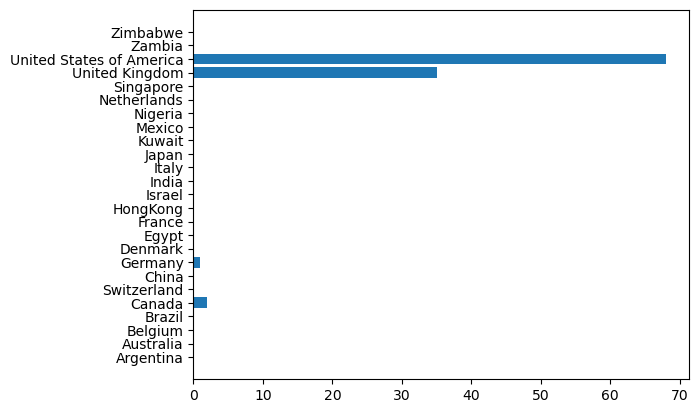

In [62]:
plt.barh(data2[0],data2[1])

<BarContainer object of 23 artists>

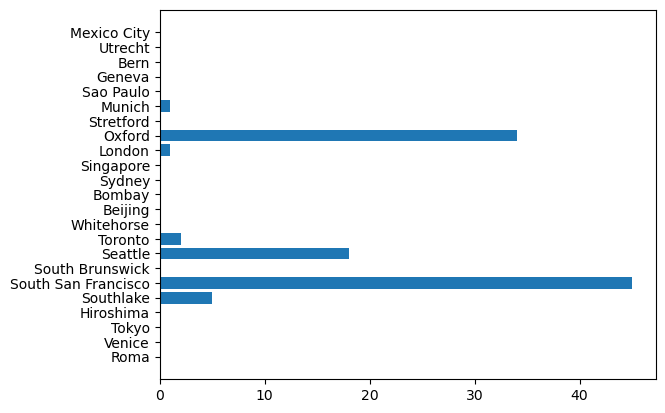

In [63]:
plt.barh(data3[0],data3[1])